# Problem Statement

##### The goal of this project is to identify health insurance policyholders who may be interested in purchasing vehicle insurance, using a dataset containing around 5,00,000 samples and various demographic and vehicle-related attributes.

Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account.

## Flowchart

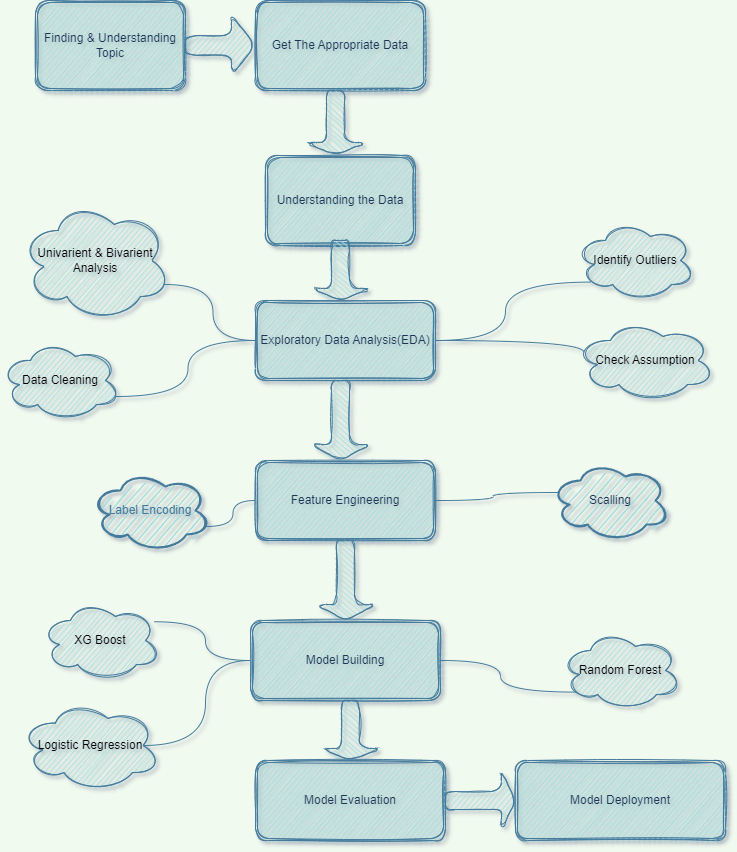

## Importing Required Packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.filterwarnings('ignore')

## Preliminary Data Processing

In [83]:
df = pd.read_csv("data/uncleaned_data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26,217.0,1
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26,183.0,0
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26,27.0,1
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152,203.0,0
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152,39.0,0


## Column Descriptions

- __Id__: Unique ID for the customer.
- __Gender__: Gender of the customer.
- __Age__: Age of the customer.
- __Driving License__: No if customer does not have DL, Yes if customer already has DL.
- __Region Code__: Unique code for the region of the customer.
- __Previously Insured__: Yes if customer already has vehicle insurance, No if customer doesn't have vehicle insurance.
- __Vehicle Age__: Age of the vehicle.
- __Vehicle Damage__: Yes if customer got his vehicle damaged in the past, No if customer didn't get his vehicle damaged in the past.
- __Anual Premium__: The amount customer needs to pay as premium in the year.
- __Policy sales channel__: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- __Vintage__: Number of Days, customer has been associated with the company.
- __Response__: 1 if customer is interested, 0 if customer is not interested.

## Data dimensions

In [ ]:
df.shape

Number of rows = 508146              
Number of column = 12

### Dropping 'id' column

In [84]:
del df['id']
df.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
508141,Female,26,Yes,37.0,Yes,< 1 Year,No,30867.0,152,56.0,0
508142,Female,38,Yes,28.0,No,1-2 Year,Yes,28700.0,122,165.0,1
508143,Male,21,Yes,46.0,Yes,< 1 Year,No,29802.0,152,74.0,0
508144,Male,71,Yes,28.0,Yes,1-2 Year,No,62875.0,26,265.0,0
508145,Male,41,Yes,29.0,Yes,1-2 Year,No,27927.0,124,231.0,0


## Structure of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  object 
 1   Age                   508146 non-null  int64  
 2   Driving_License       508083 non-null  object 
 3   Region_Code           508037 non-null  float64
 4   Previously_Insured    508146 non-null  object 
 5   Vehicle_Age           508044 non-null  object 
 6   Vehicle_Damage        508146 non-null  object 
 7   Annual_Premium        502470 non-null  float64
 8   Policy_Sales_Channel  508146 non-null  int64  
 9   Vintage               495209 non-null  float64
 10  Response              508146 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 42.6+ MB


# Exploratory data analysis (EDA)

## Descriptive Statistics

### Numerical Attributes

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,508146.0,38.808413,15.500179,20.0,25.0,36.0,49.0,85.0
Region_Code,508037.0,26.406655,13.224954,0.0,15.0,28.0,35.0,52.0
Annual_Premium,502470.0,30559.075099,17156.968414,2630.0,24383.0,31663.0,39409.0,540165.0
Policy_Sales_Channel,508146.0,111.975838,54.246027,1.0,26.0,133.0,152.0,163.0
Vintage,495209.0,154.331638,83.662643,10.0,82.0,154.0,227.0,299.0
Response,508146.0,0.153958,0.360909,0.0,0.0,0.0,0.0,1.0


- The age mean is 39 years and the maximum value is 85 years. The variation is higher than 0.40. The skew is right skewed and kurtosis isn't 0, therefore the distribution isn't normal.
- The region code is not a normal distribution because it has got negative skew and kurtosis. The min code is 0 and it may be a invalid code. The variation is higher because it's 0.50.
- It has a higher negative skew and kurtosis!
- The range is 537,535, so there's a great difference in some users to pay.
- The maximum number of days to be with the company is 299 days and 10 days is the minimum. The skew is almost 0.0000, however the variation coeficient is greater than 0.50 and kurstosis is negative.

### Categorical Attributes

In [7]:
df.describe(include='object').T

,count,unique,top,freq
Gender,508146,2,Male,274325
Driving_License,508083,2,Yes,507034
Previously_Insured,508146,2,No,275076
Vehicle_Age,508044,3,1-2 Year,266962
Vehicle_Damage,508146,2,Yes,256248


- There's only two types of gender and the top is male.
- The most common 'No', in other words, the most people in this database don't have vehicle insurance.
- The top value for driving_license is 'yes'. However, there are some people which doesn't have driving license.
- The vehicle age most common is 1-2 years.
- There are more accident vehicles than those that do not have an accident history.

## Check NA values

In [8]:
df.isna().sum()

Gender                      0
Age                         0
Driving_License            63
Region_Code               109
Previously_Insured          0
Vehicle_Age               102
Vehicle_Damage              0
Annual_Premium           5676
Policy_Sales_Channel        0
Vintage                 12937
Response                    0
dtype: int64

<AxesSubplot:>

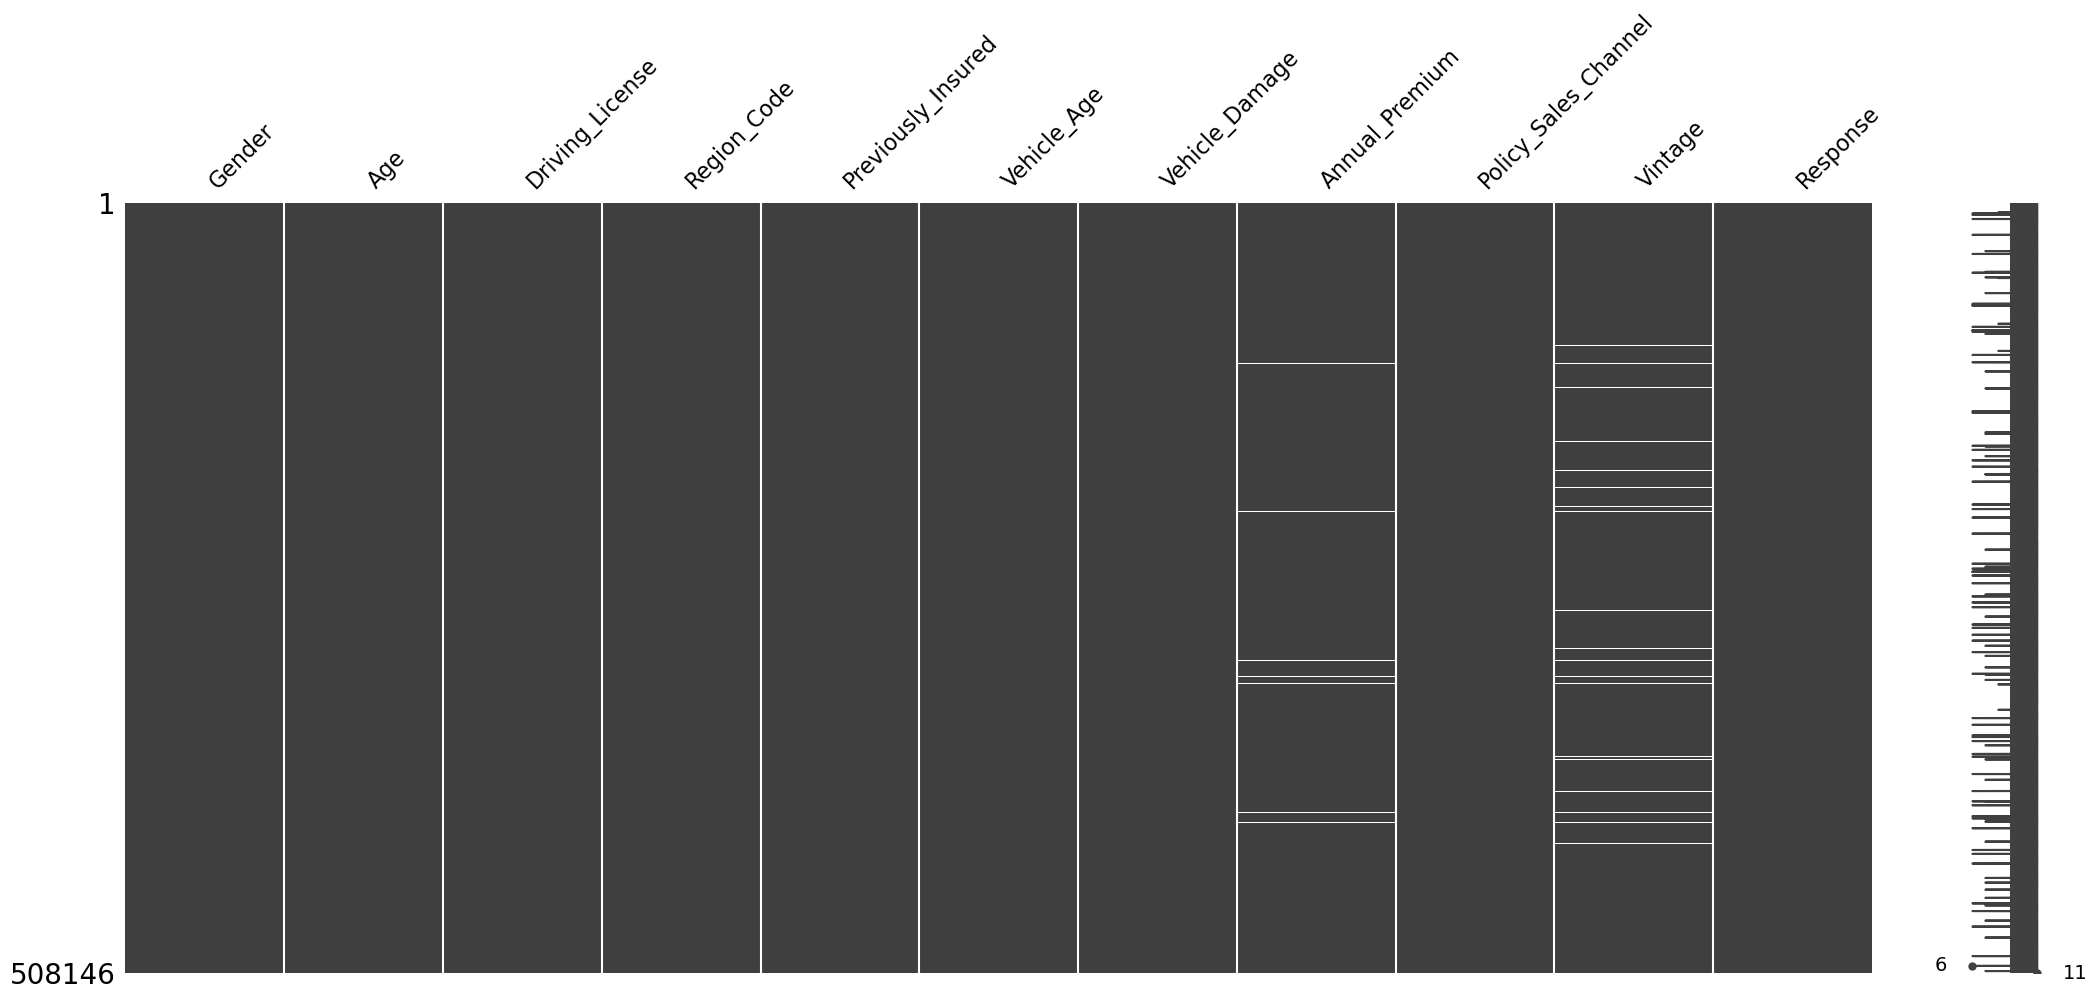

In [9]:
import missingno as msno
msno.matrix(df)

## Removing rows having max NA values

In [85]:
# Remove rows that have the maximum number of missing values
df.dropna(thresh=9, inplace=True)

In [11]:
# df.dropna(subset=["Driving_License", "Region_Code", "Vehicle_Age"], inplace=True)

In [12]:
df.shape

(508037, 11)

Total of 109 rows where deleted which contained maximum number of NA values

## Fill Out NA

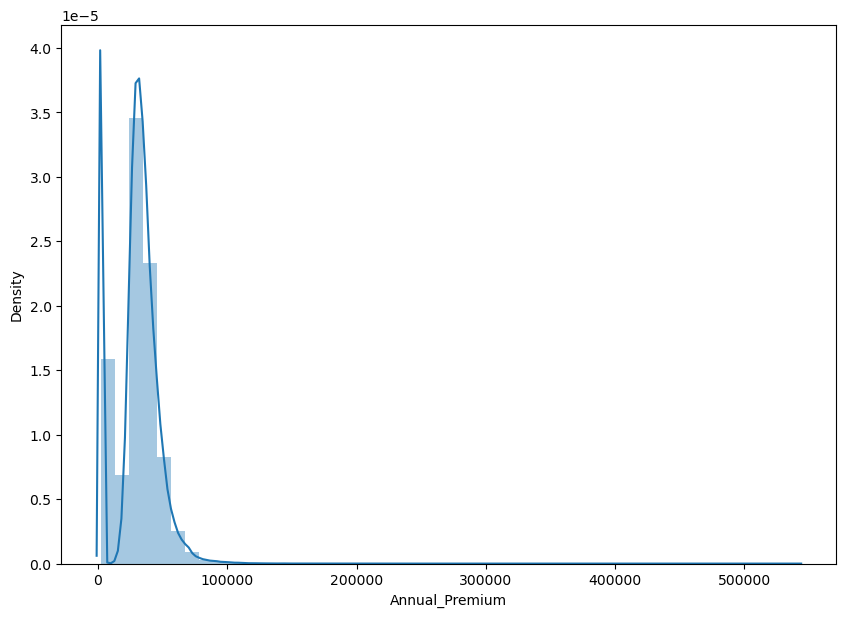

In [13]:
plt.figure(figsize=(10,7))
sns.distplot(df['Annual_Premium'])
plt.savefig('images/hist_AP.png')
plt.show()

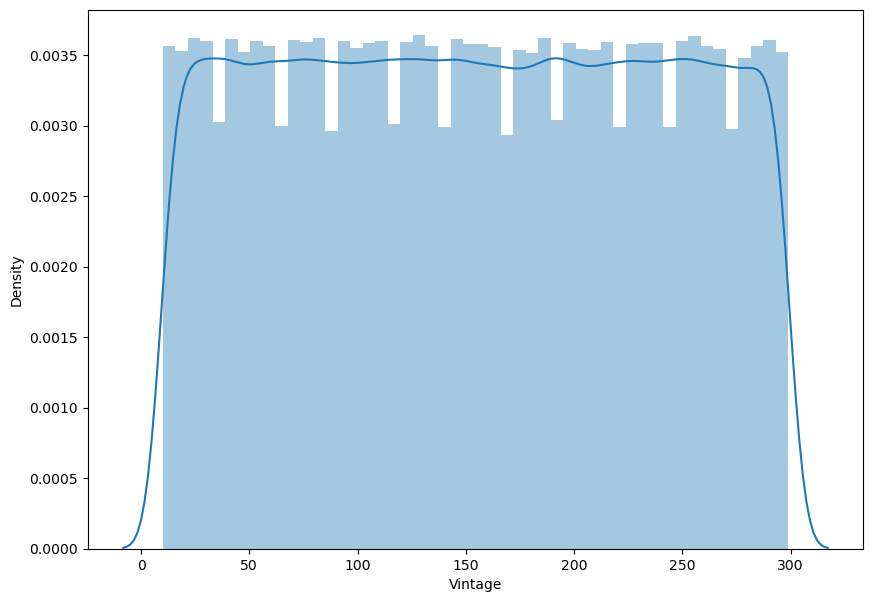

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(df['Vintage'])
plt.savefig('images/hist_Vintage.png')
plt.show()

In [15]:
df.corr(method="spearman")

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,0.012219,0.099086,-0.647023,-0.000752,0.179688
Region_Code,0.012219,1.000000,-0.037788,-0.014219,-0.001607,-0.000166
Annual_Premium,0.099086,-0.037788,1.000000,-0.198181,-0.000192,0.033300
Policy_Sales_Channel,-0.647023,-0.014219,-0.198181,1.000000,-0.000874,-0.186684
Vintage,-0.000752,-0.001607,-0.000192,-0.000874,1.000000,-0.001828
Response,0.179688,-0.000166,0.033300,-0.186684,-0.001828,1.000000


Annual_Premium and Vintage column doesn't have good correlation with rest of the coloumns, because of this reason a model cannot be used to predict the NA values in the dataset.

I also tried building a random forrest model to impute the data but it's accuracy is not at all good.

It is ok to use mean/median/mode if missing data is less than 3%, otherwise introduces too much bias and artificially lowers variability of data.

- __Mean__-It is preferred if data is numeric and not skewed.
- __Median__-It is preferred if data is numeric and skewed.
- __Mode__-It is preferred if the data is a string(object) or numeric.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [86]:
Annual_premium_median = df['Annual_Premium'].median()
Annual_premium_median

31663.0

In [87]:
df['Annual_Premium'].fillna(Annual_premium_median, inplace=True)

In [39]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=7)

train_data_missing = train_data[train_data["Vintage"].isnull()]
train_data_not_missing = train_data[train_data["Vintage"].notnull()]

features = ["Gender", "Age", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Annual_Premium"]

rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_data_not_missing[features], train_data_not_missing["Vintage"])

train_data_missing["Vintage"] = rf.predict(train_data_missing[features])

test_data_missing = test_data[test_data["Vintage"].isnull()]
test_data_not_missing = test_data[test_data["Vintage"].notnull()]

test_data_missing["Vintage"] = rf.predict(test_data_missing[features])

test_data_predicted = pd.concat([test_data_missing, test_data_not_missing], axis=0)
test_score = rf.score(test_data_predicted[features], test_data_predicted["Vintage"])

In [40]:
test_score

-0.12948121344533248

In [88]:
vintage_mean = round(df['Vintage'].mean(), 2)
vintage_mean

154.33

In [89]:
df['Vintage'].fillna(vintage_mean, inplace=True)

In [90]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Hypothesis Selection 
Hypothesis Testing is the first step we take towards understanding the data. Hypothesis Testing gives us the head-start towards understanding the problem.

- __Gender:__ Males are more likely to buy Vehicle Insurance.
- __Age:__ Young people account for less than 30% of custumers who want insurance.
- __Driving_License:__ Customers who generally have Driving License take Insurance.
- __Vechile_Age:__ 60% or more of the customers with two-year-old cars are more likely to buy insurace.
- __Vechile_Damage:__ Less than 40% of customers who have damaged the vehicle don't want to get the vechile insurance.
- __Annual_Premium:__ Customers generally opt for Insurance where Premium is not too high.
- __Policy_Sales_Channel:__ The more time associated, customers are more likely to buy insurance.
- __Vintage:__ Older customers are more likely to buy insurance.

## Univariate Analysis

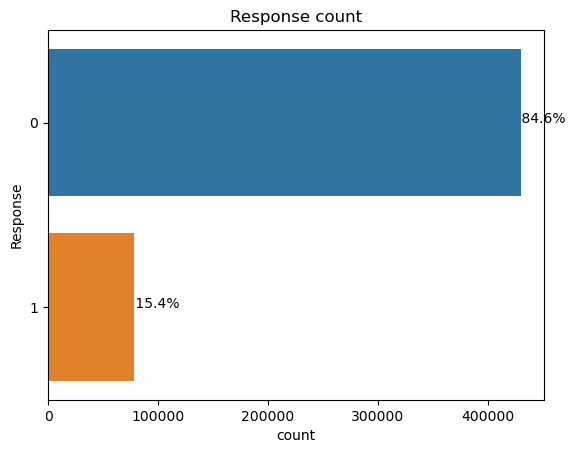

In [45]:
ax = sns.countplot(y='Response', data=df)

total = df['Response'].size
for p in ax.patches:
    
        # Calculate the percentage of responses for each bar
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        
        # Add the percentage label to the bar
        x = p.get_x() + p.get_width() - 3000
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Response count')
plt.savefig('images/UA_1.png')

### Numerical Variables

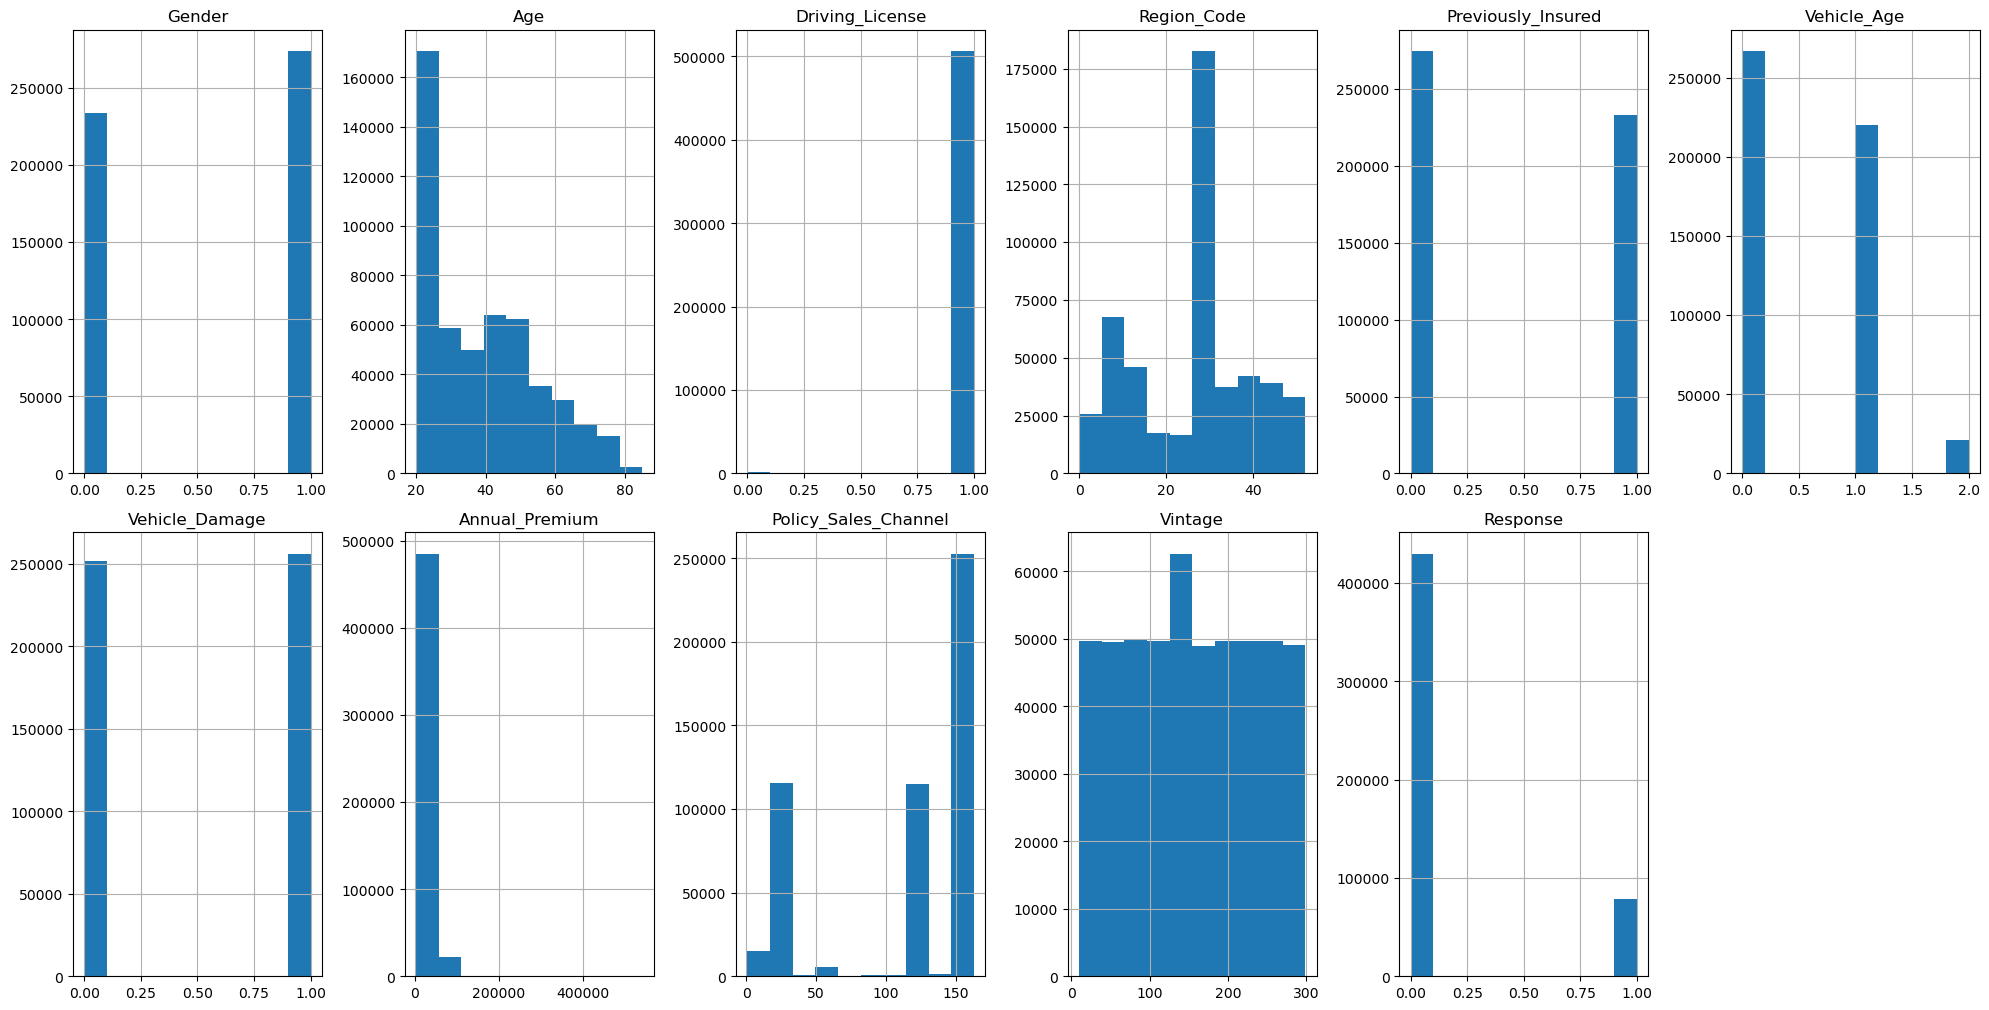

In [46]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.savefig('images/UA_numeric_var.png')
plt.show()

ValueError: num must be 1 <= num <= 8, not 9

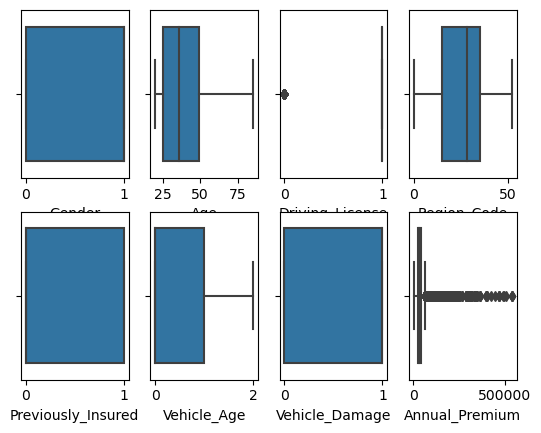

In [71]:
aux1 = df.select_dtypes(exclude='object')
columns = aux1.columns.tolist()
j = 1

for column in columns:
    plt.subplot(2, 4, j)
    sns.boxplot(aux1[column]);
    
    j += 1
    
plt.savefig('images/boxplot.png')

### Categorical Variables

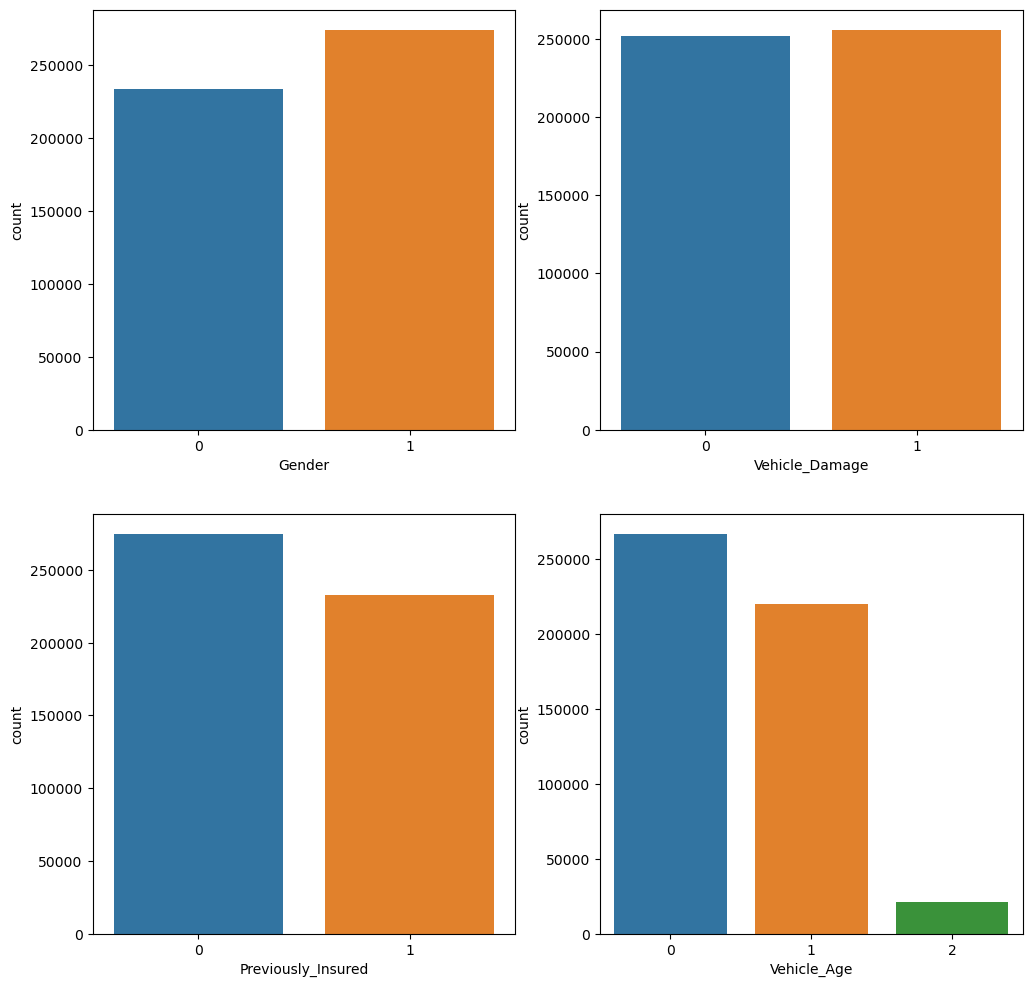

In [67]:
# Create a figure with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Add a bar chart for the Gender 
sns.countplot(x='Gender', data=df, ax=ax[0][0])

# Add a bar chart for the Previously_Insured 
sns.countplot(x='Previously_Insured', data=df, ax=ax[1][0])

# Add a bar chart for the Vehicle_Damage
sns.countplot(x='Vehicle_Damage', data=df, ax=ax[0][1])

# Add a bar chart for the Vehicle_Age 
sns.countplot(x='Vehicle_Age', data=df, ax=ax[1][1])

plt.savefig('images/UA_cat_var.png')
plt.show()

#### Conclusion:
- We can see that our dataset is heavily imbalanced in the response field. With most of the values in class 0

- We can see balanced Gender field.

- Certainly, most of our customers must have driving license in order to drive a car. Few of our customers don't have DL, maybe because they're underage, waiting to be eligible for a DL.

- A balanced Previously_insured field, slightly larger portion of our customers don't have vehicle insurance. They are our potential clients.

- Most of our clients own new cars (<2 years of Vehicle Age). So our further findings will mostly reflect for customers who own new cars, it may not be true for old car (> 2 years)

## Bivariate Analysis

In [53]:
def plot_count_and_percentage(df, column, response_col, title):
    aux = df[df[response_col] == 1]
    ax = sns.countplot(y=column, data=aux)
    total = aux[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.savefig(f"images/BA_{title}.png")
    plt.title(title)

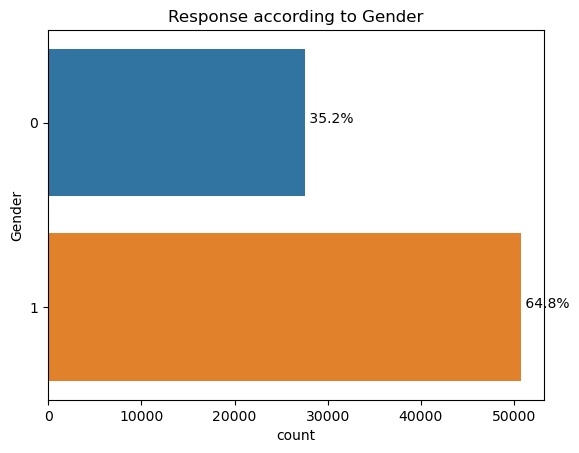

In [54]:
plot_count_and_percentage(df, 'Gender', 'Response', 'Response according to Gender')

- __Our hypothesis was right that Males are more likely to buy Vehicle Insurance. we can see that 64% of males are intersted in buying the insurance.__

In [55]:
df['Age'].describe()

count    508037.000000
mean         38.808140
std          15.499914
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [56]:
df.loc[(df['Age']>=3) & (df['Age']<18),'Age_label']='Youth' ## Young ppl
df.loc[(df['Age']>=18) & (df['Age']<29),'Age_label']='Youth' ## Young ppl
df.loc[(df['Age']>=29) & (df['Age']<55),'Age_label']='Adult' ## Mid-Age Ppl
df.loc[(df['Age']>=55) & (df['Age']<=85),'Age_label']='Old Age' ## Old Age

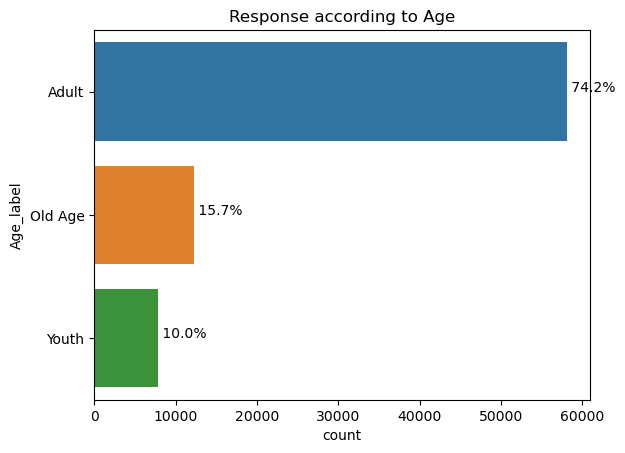

In [57]:
plot_count_and_percentage(df, 'Age_label', 'Response', 'Response according to Age')

- __It is right that Young people account for less than 30% of customers who want insurance.__
- __Adults are more likely to buy vechile insurance.__

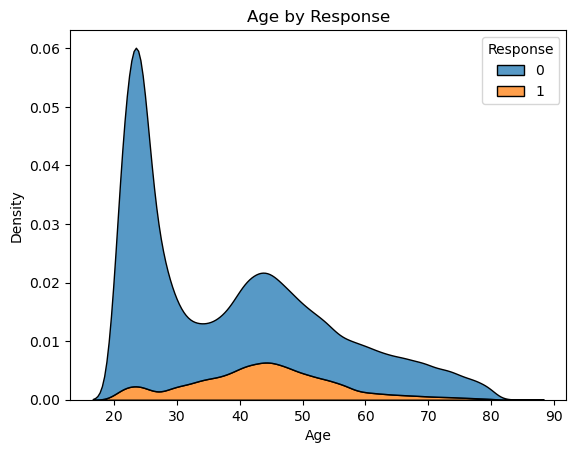

In [58]:
# Using seaborn's kdeplot function to plot the Age column of the DataFrame with hue(color) set to the Response column
sns.kdeplot(x='Age', data=df, hue='Response', multiple="stack");
plt.title("Age by Response")
plt.savefig('images/BA_Age_by_response.png')

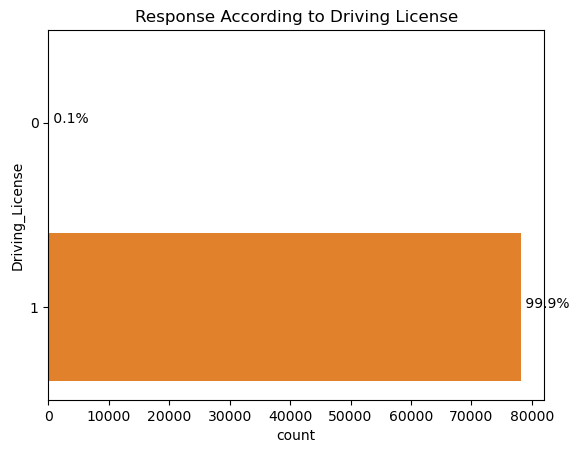

In [59]:
plot_count_and_percentage(df, 'Driving_License', 'Response', 'Response According to Driving License')

- __Customers who generally have Driving License take Insurance.__

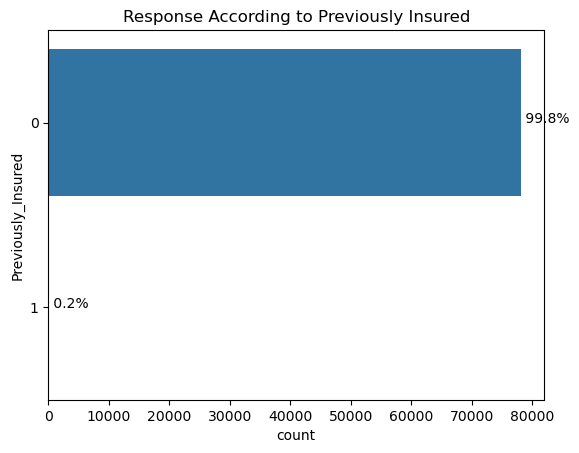

In [60]:
plot_count_and_percentage(df, 'Previously_Insured', 'Response', 'Response According to Previously Insured')

- __It is obivious that if a person already has vechile insurance then he will not be interested in our insurace. Above graph excatly supports our statement.__

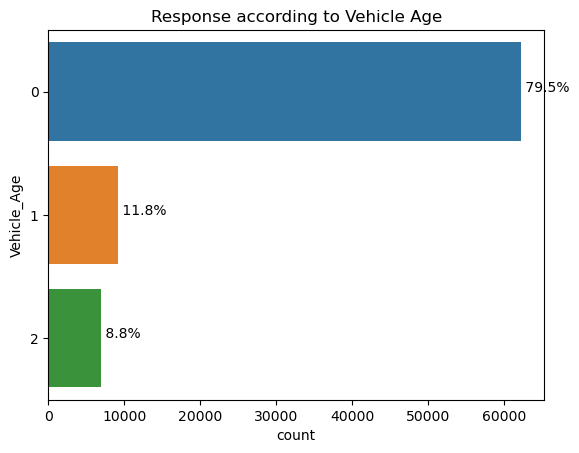

In [61]:
plot_count_and_percentage(df, 'Vehicle_Age', 'Response', 'Response according to Vehicle Age')

- __It is true that 60% or more of the customers with two-year-old cars are more likely to buy insurace.__
- __Customers(79.5%) having vechile of age 1-2 years are more likely to buy our insurance.__

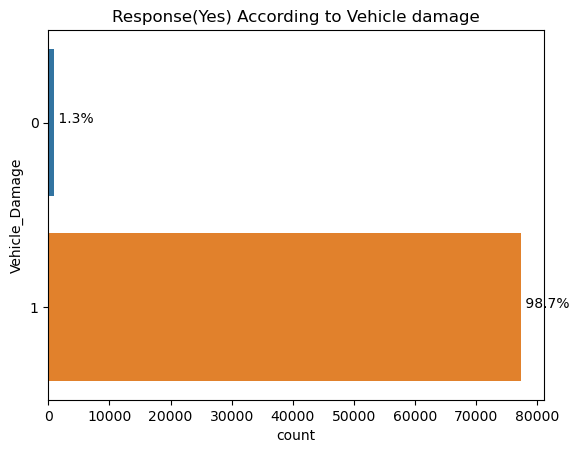

In [62]:
plot_count_and_percentage(df, 'Vehicle_Damage', 'Response', 'Response(Yes) According to Vehicle damage')

- __In above graph we can see that if a persons vechile is damaged he is highly likely to buy insurance for his vechile. Around 98% people whose car is damaged are likely to buy insurance.__
- __In below graph we can see that if vechile is not damaged then 58.4% people are not interseted in buying the insurance for their vechile.__
- __Around than 41% of customers who have damaged the vehicle don't want to get the vechile insurance.__

Text(0.5, 1.0, 'Response(No) According to Vechile damage')

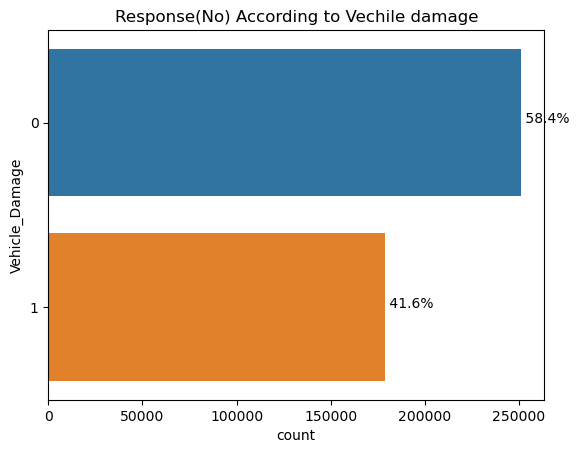

In [63]:
aux1 = df[df['Response'] == 0]
ax = sns.countplot(y='Vehicle_Damage', data=aux1);

total = aux1['Vehicle_Damage'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.title("Response(No) According to Vechile damage")

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

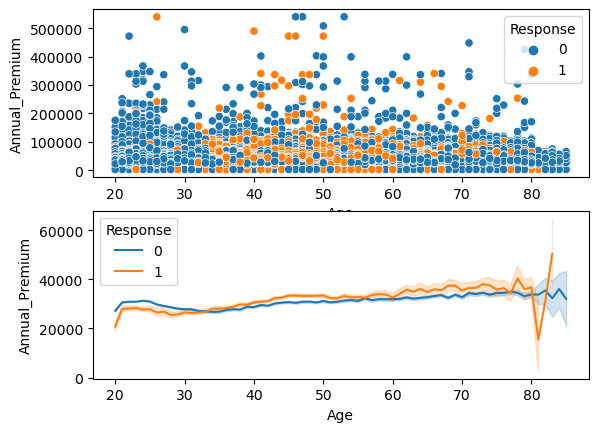

In [64]:
plt.subplot(2, 1, 1)
sns.scatterplot(x='Age', y='Annual_Premium', data=df, hue='Response')

plt.subplot(2, 1, 2)
sns.lineplot(x='Age', y='Annual_Premium', data=df, hue='Response')

- __We can say that as age increases annual premium is slightly increasing. Annual premium does not have any significant impact on response of the customer.__

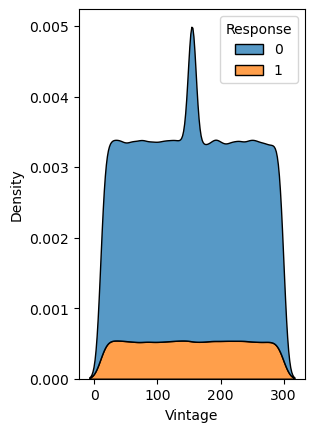

In [65]:
plt.subplot(1, 2, 2)
sns.kdeplot(x='Vintage', data=df, hue='Response', multiple="stack");

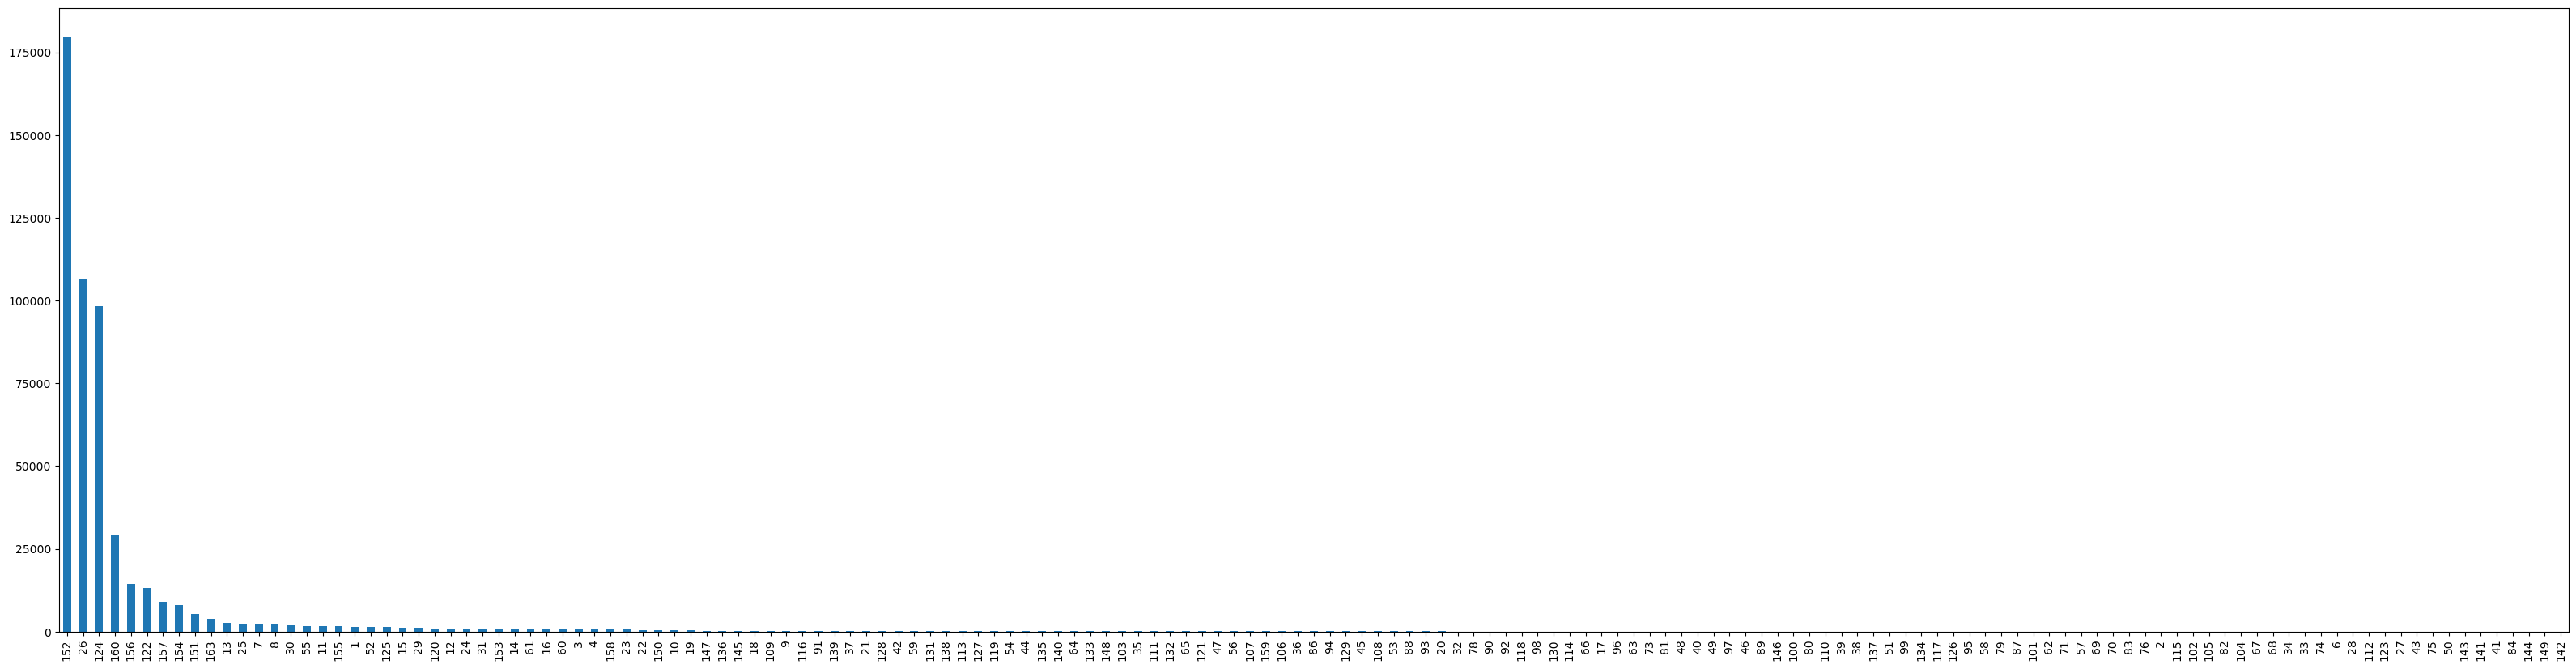

In [66]:
plt.figure(figsize=(40,10))
df['Policy_Sales_Channel'].value_counts().plot.bar()
plt.savefig('images/sales_channel.png')

### Saving data

In [ ]:
df.to_csv('data/cleaned_data.csv')

# Feature Engineering

## Loading data

In [102]:
df2 = pd.read_csv('data/cleaned_data.csv')

## Data cleaning

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508037 entries, 0 to 508036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508037 non-null  object 
 1   Age                   508037 non-null  int64  
 2   Driving_License       508037 non-null  object 
 3   Region_Code           508037 non-null  int64  
 4   Previously_Insured    508037 non-null  object 
 5   Vehicle_Age           508037 non-null  object 
 6   Vehicle_Damage        508037 non-null  object 
 7   Annual_Premium        508037 non-null  int64  
 8   Policy_Sales_Channel  508037 non-null  int64  
 9   Vintage               508037 non-null  float64
 10  Response              508037 non-null  int64  
 11  Age_label             508037 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 46.5+ MB


In [104]:
from sklearn.preprocessing import LabelEncoder

def get_encoding(df2, col):
  encoder = LabelEncoder()
  df2[col] = encoder.fit_transform(df2[col])

  labels = {encoded: original for encoded, original in enumerate(encoder.classes_)}
  print(labels)

In [105]:
get_encoding(df2, 'Gender')

{0: 'Female', 1: 'Male'}


In [106]:
get_encoding(df2, 'Driving_License')

{0: 'No', 1: 'Yes'}


In [107]:
get_encoding(df2, 'Previously_Insured')

{0: 'No', 1: 'Yes'}


In [108]:
get_encoding(df2, 'Vehicle_Age')

{0: '1-2 Year', 1: '< 1 Year', 2: '> 2 Years'}


In [109]:
get_encoding(df2, 'Vehicle_Damage')

{0: 'No', 1: 'Yes'}


In [110]:
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_label
0,1,44,1,28,0,2,1,40454,26,217.0,1,Adult
1,1,76,1,3,0,0,0,33536,26,183.0,0,Old Age
2,1,47,1,28,0,2,1,38294,26,27.0,1,Adult
3,1,21,1,11,1,1,0,28619,152,203.0,0,Youth
4,0,29,1,41,1,1,0,27496,152,39.0,0,Adult


## Creating New Feature

In [111]:
new_column = df2.apply(lambda row: 1 if row["Vehicle_Age"] == 0 and row["Vehicle_Damage"] == 1 else 0, axis=1)

# Insert the new column into the second-last position
df2.insert(len(df2.columns)-2, "vehicle_age_x_damage", new_column)

- If a customer's vehicle age is less than one year and their vehicle has previously been damaged, the new feature takes on a value of 1. If not, the value is 0.
- This feature __may be__ useful in predicting whether a customer is interested in buying a car insurance policy based on their vehicle's age and prior damage history.

Text(0.5, 1.0, 'Correlation HeatMap')

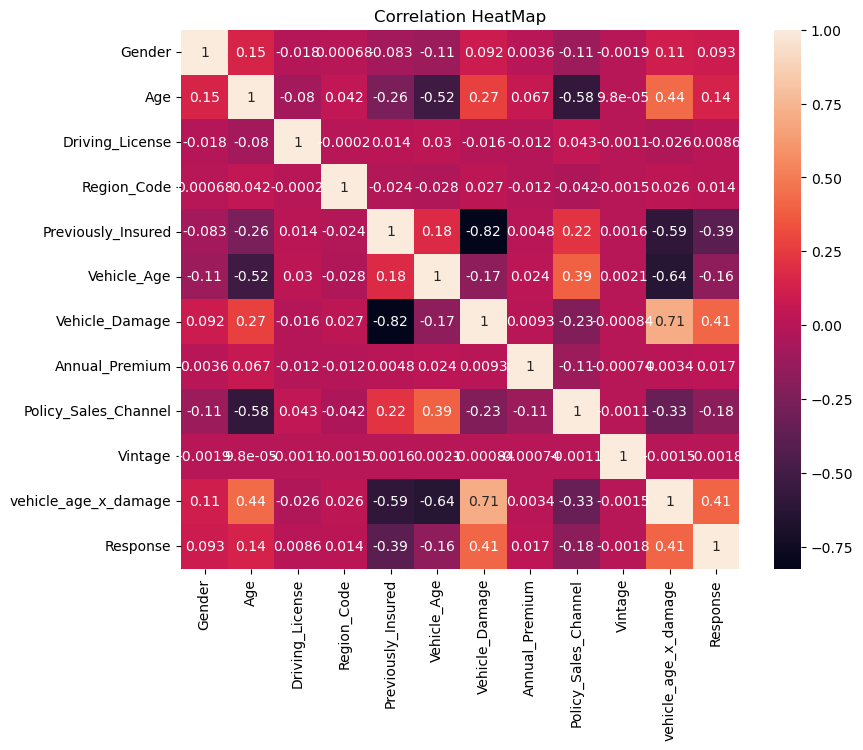

In [112]:
plt.figure(figsize=(9,7))
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation HeatMap')

- "Vehicle_Damage" and "Previously_Insured" columns have a strong correlation of -0.82 between them.
- Linear models may be affected by this multicollinearity, but non-parametric models, such as tree-based models, may not be as affected.
- We will check the impact of these columns on the model during the model building process.

## Separating features variables and target variable.

In [113]:
X = df2.drop(columns=['Response', 'Age_label', 'vehicle_age_x_damage'], axis=1)
X = X.values
y = df2['Response']

### Baseline model

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(random_state=7)
lr_model.fit(x_train, y_train)

LogisticRegressionCV(random_state=7)

In [20]:
from sklearn.metrics import classification_report

y_pred = lr_model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91    107520
           1       0.46      0.09      0.15     19490

    accuracy                           0.84    127010
   macro avg       0.66      0.54      0.53    127010
weighted avg       0.79      0.84      0.80    127010



## Balancing Dataset

In [116]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(X, y)

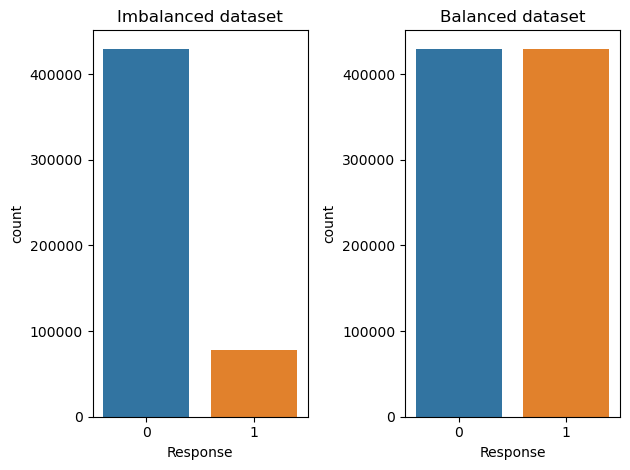

In [117]:
plt.subplot(121)
sns.countplot(y)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_balanced)
plt.title('Balanced dataset')

plt.tight_layout()
plt.savefig('images/balancing.png')
plt.show()

### Spliting into Train and Test

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25, random_state=7)

### Scaling data

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

## Model Building

#### Importing Required Packages

In [97]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

#### Functions for reports

In [91]:
def generate_classification_report(lr_model, x_test, y_test):
    y_pred = lr_model.predict(x_test)
    class_report = classification_report(y_test, y_pred)
    print("Classification report:\n", class_report)

In [92]:
def calculate_auc_roc(lr_model, x_test, y_test):
    y_pred_proba = lr_model.predict_proba(x_test)[:,1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print("AUC-ROC score:", auc_roc)

In [93]:
def plot_auc_roc(model_name, lr_model, x_test, y_test):
    y_pred_proba = lr_model.predict_proba(x_test)[:,1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_roc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [94]:
def plot_confusion_matrix(model, x_test, y_test):
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

#### Logistic Regression

In [40]:
lr_model = LogisticRegressionCV(penalty='l2', random_state=7)
lr_model.fit(x_train, y_train)

LogisticRegressionCV(penalty='l1', random_state=7, solver='liblinear')

In [41]:
generate_classification_report(lr_model, x_test, y_test)

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.63      0.76    107325
           1       0.73      0.97      0.83    107577

    accuracy                           0.80    214902
   macro avg       0.84      0.80      0.80    214902
weighted avg       0.84      0.80      0.80    214902



In [42]:
calculate_auc_roc(lr_model, x_test, y_test)

AUC-ROC score: 0.8521096562817995


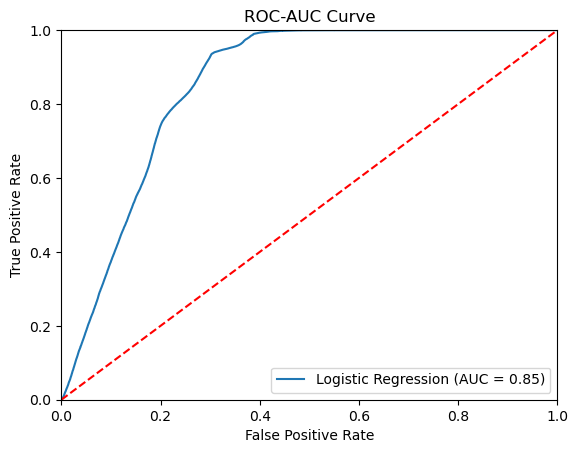

In [43]:
plot_auc_roc("Logistic Regression", lr_model, x_test, y_test)

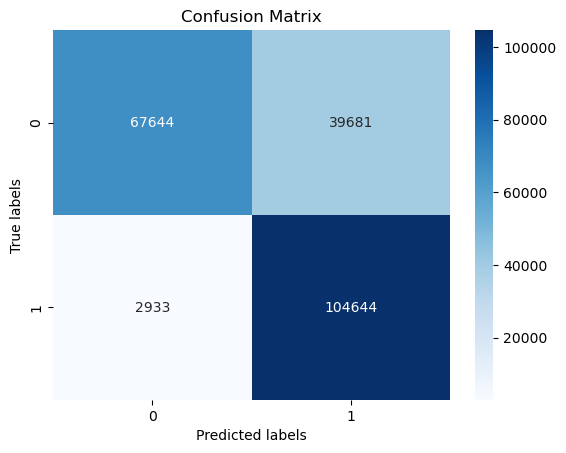

In [44]:
plot_confusion_matrix(lr_model, x_test, y_test)

#### Naive Bayes

In [121]:
# Initialize the model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(x_train, y_train)

GaussianNB()

In [122]:
generate_classification_report(nb_model, x_test, y_test)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79    107325
           1       0.76      0.92      0.83    107577

    accuracy                           0.81    214902
   macro avg       0.83      0.81      0.81    214902
weighted avg       0.83      0.81      0.81    214902



In [123]:
calculate_auc_roc(nb_model, x_test, y_test)

AUC-ROC score: 0.8682260911815838


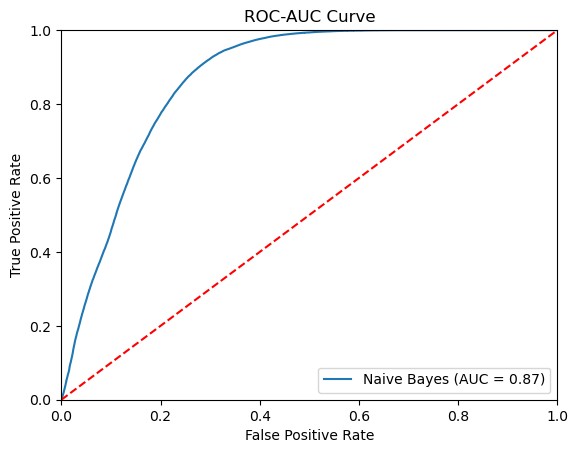

In [124]:
plot_auc_roc("Naive Bayes", nb_model, x_test, y_test)

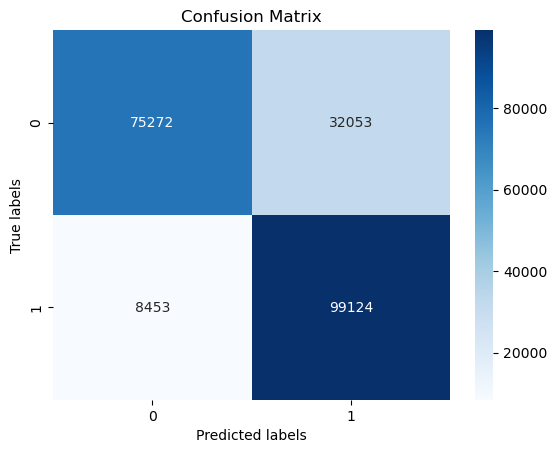

In [125]:
plot_confusion_matrix(nb_model, x_test, y_test)

#### K-Nearest Neighbors

In [ ]:
# Initialize the model with n_neighbors = 3
knn_model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

# Train the model on the training set
knn_model.fit(x_train, y_train)

In [ ]:
generate_classification_report(knn_model, x_test, y_test)

In [ ]:
calculate_auc_roc(knn_model, x_test, y_test)

In [ ]:
plot_auc_roc("KNearest Neighbour", knn_model, x_test, y_test)

In [ ]:
plot_confusion_matrix(knn_model, x_test, y_test)

#### Decision Tree

_Applying GridSearch_

In [ ]:
param_grid = {
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'max_depth': [3, 4, 5, 6, 7, 9, 11],
    'criterion': ['entropy', 'gini']
}

In [ ]:
gridDecisionTree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, cv = 5)

In [ ]:
gridDecisionTree.fit(x_train, y_train)

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Depth: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

_Building decision tree with above parameters_

In [ ]:
d_model = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 7, max_depth= 11, random_state=7)

# Train the model on the training set
d_model.fit(x_train, y_train)

In [ ]:
generate_classification_report(d_model, x_test, y_test)

In [ ]:
calculate_auc_roc(d_model, x_test, y_test)

In [ ]:
plot_auc_roc("Decision tree", d_model, x_test, y_test)

In [ ]:
plot_confusion_matrix(d_model, x_test, y_test)

#### Random Forrest

_Applying GridSearch_

In [ ]:
param_grid = {
    'n_estimators': [100, 130, 150, 200],
    'max_depth': [2, 4, 5, 6, 7]
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

_Building Random Forrest Tree_

In [134]:
rf_model = RandomForestClassifier(n_estimators=130, max_depth=6)

In [135]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=130)

In [136]:
param = rf_model.get_params()
print("Best parameters:", param)

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [137]:
generate_classification_report(rf_model, x_test, y_test)

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.84    107325
           1       0.80      0.96      0.87    107577

    accuracy                           0.86    214902
   macro avg       0.87      0.86      0.86    214902
weighted avg       0.87      0.86      0.86    214902



In [138]:
calculate_auc_roc(rf_model, x_test, y_test)

AUC-ROC score: 0.9434627276578587


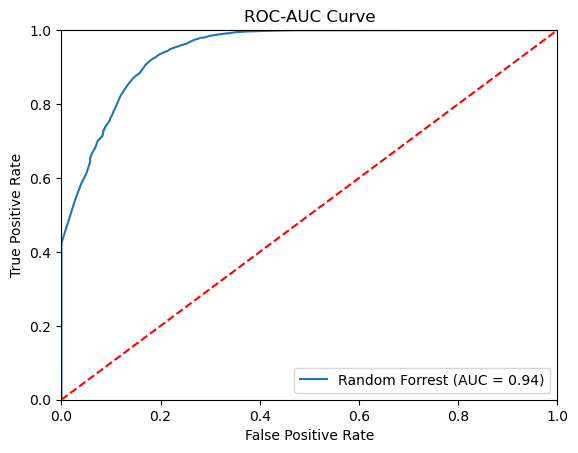

In [139]:
plot_auc_roc("Random Forrest", rf_model, x_test, y_test)

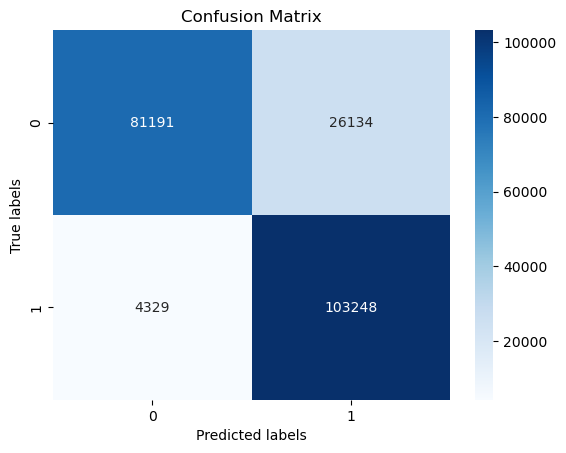

In [140]:
plot_confusion_matrix(rf_model, x_test, y_test)

#### XGBOOST Model

In [126]:
# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
generate_classification_report(xgb_model, x_test, y_test)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91    107325
           1       0.91      0.90      0.91    107577

    accuracy                           0.91    214902
   macro avg       0.91      0.91      0.91    214902
weighted avg       0.91      0.91      0.91    214902



In [128]:
calculate_auc_roc(xgb_model, x_test, y_test)

AUC-ROC score: 0.9795225136828574


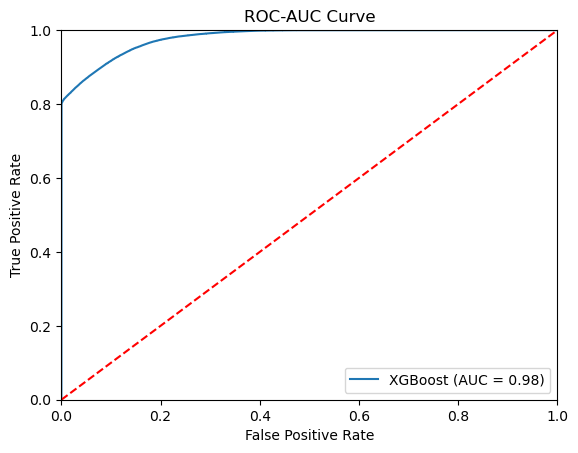

In [129]:
plot_auc_roc("XGBoost", xgb_model, x_test, y_test)

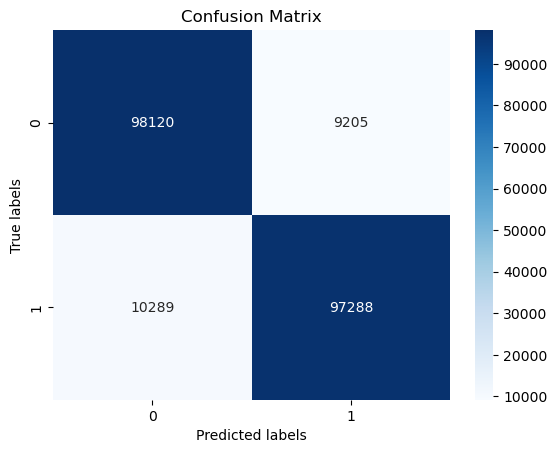

In [130]:
plot_confusion_matrix(xgb_model, x_test, y_test)

#### Finding most important features

In [131]:
columns = df2.drop(columns=['Response', 'Age_label', 'vehicle_age_x_damage'], axis=1).columns
columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [132]:
feature_imp_random = pd.Series(xgb_model.feature_importances_, index = columns).sort_values(ascending = False)

In [133]:
feature_imp_random

Vehicle_Damage          0.698692
Previously_Insured      0.135870
Gender                  0.078782
Vehicle_Age             0.039601
Age                     0.018227
Region_Code             0.010931
Policy_Sales_Channel    0.009423
Driving_License         0.005135
Vintage                 0.001671
Annual_Premium          0.001667
dtype: float32

__Conclusion:__ 
- From all the models trained RandomForrest and XGBoost has performed best with an accuracy score of 91%.
- We will use XGBoost for prediction purpose and export it using pickle.

### Exporting Model Using Pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb_model, open('model/xgb_model.pkl','wb'))

In [ ]:
df2.head()

In [ ]:
#Loading model to compare the results
model = pickle.load(open('model/xgb_model.pkl','rb'))
print(model.predict([[0, 44, 1, 28, 0, 2, 1, 40454, 26, 241]]))